# Business Understanding

In the Cross-Industry Standard Process for Data Mining (CRISP-DM), the first step is business understanding. This phase focuses on understanding the project's objectives and requirements from a business perspective. For a travel website, employing a recommender system aligns perfectly with enhancing user engagement and satisfaction. 

**Why a Recommender System Is Important:**
1. **Personalization:** Travelers often have specific preferences, like budget, destination type, or activities. A recommender system customizes recommendations to individual tastes, increasing user satisfaction.

2. **Discovery:** It helps users discover destinations or activities they might not have considered but would likely enjoy based on their interests and previous behaviors.

3. **Engagement & Retention:** Personalized recommendations encourage users to explore more options and spend more time on the platform, improving loyalty and increasing booking rates.

4. **Revenue Growth:** By promoting relevant accommodations, tours, or package deals, a recommender system can directly boost the average booking value.

5. **Competitive Advantage:** Travel websites are highly competitive. A sophisticated recommendation engine can provide a distinct advantage by delivering a superior user experience.

6. **Data Utilization:** It enables the effective use of customer data, which can also provide insights for targeted marketing campaigns.

**Conclusion:**
A recommender system is crucial for a travel website's growth strategy. It not only helps the business understand customer needs better but also provides users with a seamless, curated experience, resulting in better engagement and higher revenue. The business understanding phase of CRISP-DM ensures that the system's objectives align with business goals and delivers a clear path to successful implementation.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
travel = pd.read_csv("dataset/tourism_with_id.csv")
travel_rating = pd.read_csv("dataset/tourism_rating.csv")
users = pd.read_csv("dataset/user.csv")

# Data Understanding

In [3]:
travel.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


In [20]:
travel.groupby('City').count()

,Place_Id,Place_Name,Description,Category,Price,Rating,Time_Minutes,Coordinate,Lat,Long
City,,,,,,,,,,
Bandung,124,124,124,124,124,124,50,124,124,124
Jakarta,84,84,84,84,84,84,37,84,84,84
Semarang,57,57,57,57,57,57,28,57,57,57
Surabaya,46,46,46,46,46,46,30,46,46,46
Yogyakarta,126,126,126,126,126,126,60,126,126,126


In [4]:
travel.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662


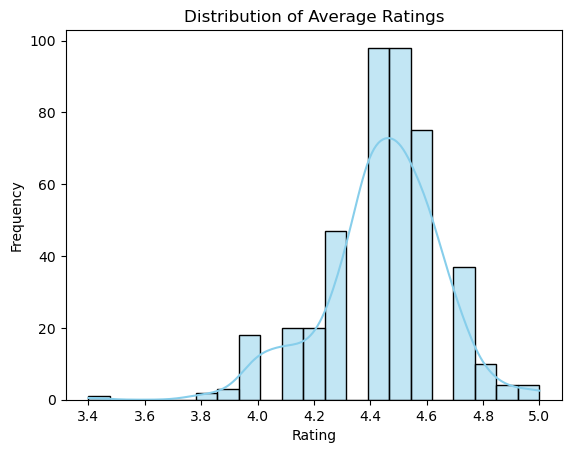

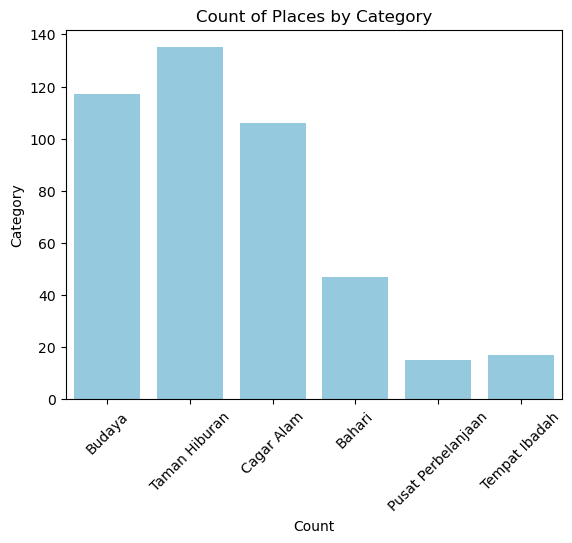

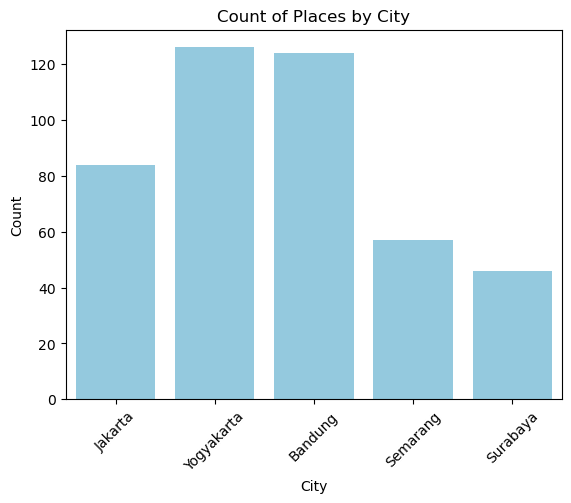

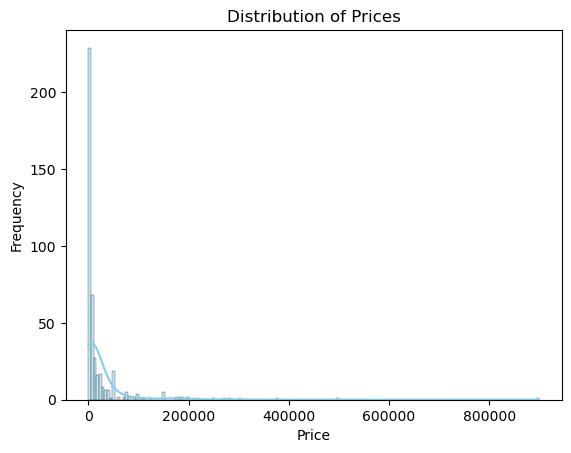

In [19]:
# Plotting the distribution of ratings
sns.histplot(travel['Rating'], kde=True, color='skyblue')
plt.title('Distribution of Average Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plotting a bar plot for categories
sns.countplot(x='Category', data=travel, color='skyblue')
plt.title('Count of Places by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

# Plotting count plot for city
sns.countplot(x='City', data=travel, color='skyblue')
plt.title('Count of Places by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plotting histogram for price
sns.histplot(travel['Price'], kde=True, color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### Conclusion 
- The plot indicates that the average rating for most places is around 4.4.
- "Taman Hiburan" receives many travel recommendations, while "tempat ibadah" and "pusat perbelanjaan" have few.
- Recommendations are available for only five cities in Indonesia: Bandung, Jakarta, Semarang, Surabaya, and Yogyakarta.
- There is a pricing anomaly, with one travel destination priced over 800,000. We'll address this later.

In [21]:
# Check the outlier travel destination
travel[travel['Price']>500000]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
13,14,Pulau Pelangi,Pulau Pelangi adalah sebuah pulau yang terleta...,Bahari,Jakarta,900000,4.8,NaN,"{'lat': -5.587055, 'lng': 106.5885}",-5.587055,106.5885


It appears that Pulau Pelangi has a fee of 900,000 rupiah toenter.

In [6]:
travel_rating.head(5)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [7]:
travel_rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


It's evident that there are 10,000 travel ratings provided here, ranging from 1 to 5.

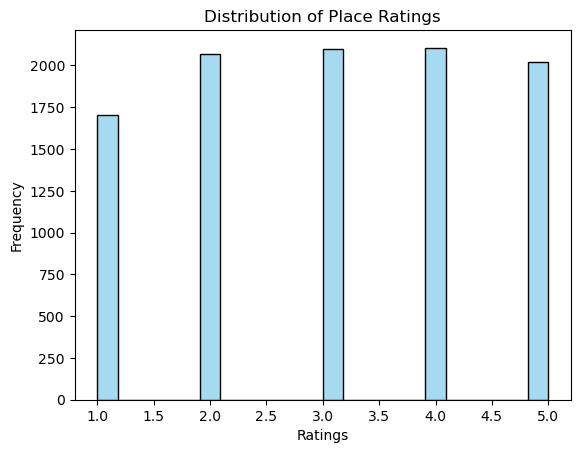

In [8]:
# Plot the distribution
sns.histplot(travel_rating['Place_Ratings'], color='skyblue')
plt.title('Distribution of Place Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

In [9]:
users.head(5)

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [10]:
users.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


Additionally, there are 300 users within the age range of 18 to 40.

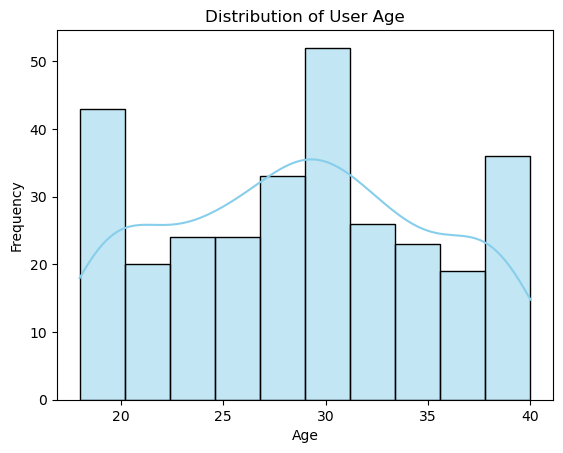

In [11]:
# Plot the distribution
sns.histplot(users['Age'], kde=True, color='skyblue')
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [12]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 37.7+ KB


In [13]:
travel.isnull().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
dtype: int64

In [14]:
travel_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [18]:
travel_rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [17]:
users.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

Looking at the data types across the three tables, it appears that the types are correct. The only column with missing values is "Time_Minutes," with 232 entries missing. So far, we have three dataframes: 
- travel which provides insights into each travel destination
- travel_rating which offers insights into user ratings
- users which contains information about every user.

# Data Preparation

In [23]:
travel_rating

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [24]:
# Merge the table
travel_merge = pd.merge(travel_rating,travel[
    ["Place_Id","Place_Name","Description","City","Category"]],
                       on='Place_Id', how='left')
travel_merge

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


In [25]:
travel_merge['City_Category'] = travel_merge[['City','Category']].agg(' '.join,axis=1)

In [26]:
travel_merge.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,City_Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya


In [27]:
travel_cleaned=travel_merge[['Place_Id', 'Place_Name', 'Category',
                             'Description','City','City_Category','Place_Ratings' ]]
travel_cleaned.head()

,Place_Id,Place_Name,Category,Description,City,City_Category,Place_Ratings
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya,3
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari,2
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan,5
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya,3
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya,4


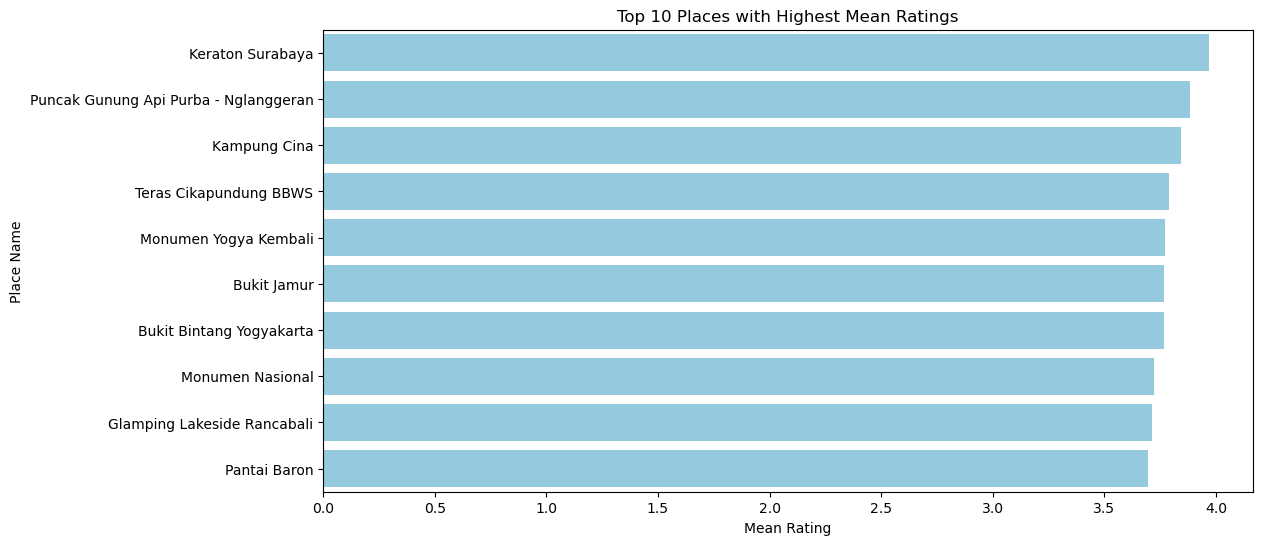

In [29]:
mean_ratings = travel_merge.groupby('Place_Name')['Place_Ratings'].mean()

# Sorting the places based on mean rating in descending order and selecting top 10
top_10_ratings = mean_ratings.sort_values(ascending=False).head(10)

# Plotting the top 10 places with the highest mean ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_ratings.values, y=top_10_ratings.index,color='skyblue')
plt.title('Top 10 Places with Highest Mean Ratings')
plt.xlabel('Mean Rating')
plt.ylabel('Place Name')
plt.show()

In [38]:
travel[travel['Place_Name'].isin(top_10_ratings.index.values)]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
51,52,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,NaN,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798
96,97,Monumen Yogya Kembali,Museum Monumen Yogya Kembali (bahasa Jawa: ꦩꦺꦴ...,Budaya,Yogyakarta,15000,4.5,30.0,"{'lat': -7.7495904, 'lng': 110.3696068}",-7.749590,110.369607
111,112,Bukit Bintang Yogyakarta,Bukit Bintang merupakan salah satu lokasi nong...,Taman Hiburan,Yogyakarta,25000,4.5,90.0,"{'lat': -7.845840699999997, 'lng': 110.4798457}",-7.845841,110.479846
138,139,Puncak Gunung Api Purba - Nglanggeran,Gunung Nglanggeran adalah sebuah gunung di Dae...,Cagar Alam,Yogyakarta,10000,4.7,60.0,"{'lat': -7.841252999999998, 'lng': 110.543056}",-7.841253,110.543056
156,157,Pantai Baron,Pantai Baron adalah salah satu objek wisata be...,Bahari,Yogyakarta,10000,4.4,NaN,"{'lat': -8.1288246, 'lng': 110.5487763}",-8.128825,110.548776
253,254,Teras Cikapundung BBWS,Teras Cikapundung Bandung sebelumnya merupakan...,Taman Hiburan,Bandung,0,4.3,60.0,"{'lat': -6.8844199, 'lng': 107.6068344}",-6.884420,107.606834
320,321,Glamping Lakeside Rancabali,Glamping Lakeside Rancabali menawarkan tempat ...,Taman Hiburan,Bandung,30000,4.4,NaN,"{'lat': -7.167590799999999, 'lng': 107.3532419}",-7.167591,107.353242
321,322,Bukit Jamur,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Cagar Alam,Bandung,0,4.2,NaN,"{'lat': -7.195110199999998, 'lng': 107.4312811}",-7.195110,107.431281
415,416,Keraton Surabaya,Kawasan yang berjuluk Kampung Keraton ini terd...,Budaya,Surabaya,0,4.4,NaN,"{'lat': -7.256755299999998, 'lng': 112.7942203}",-7.256755,112.794220


Here, it's evident that people tend to give high ratings to the "Budaya" and "Taman Hiburan" categories. The highest-rated destination is Keraton Surabaya, followed by Ouncak Gunung Api Purbba Ngalenngeran. It's worth noting that there seems to be a discrepancy in the "Price" column between the "travel" dataframe and the average rating calculation in the "travel_rating" dataframe. This may indicate an error that needs to be addressed.

#### 

# Recommender

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Content Based Filtering using Cosine Similarity

In [52]:
travel_clean = travel_merge[['Place_Id', 'Place_Name', 'Description', 'City', 'Category', 'City_Category']]
travel_clean= travel_clean.drop_duplicates("Place_Id")

## Count Vectorizer  based on City and Category

In [84]:
cv1 = CountVectorizer()
count_matrix1 = cv1.fit_transform(travel_clean['City_Category'])
count_matrix1

<437x15 sparse matrix of type '<class 'numpy.int64'>'
	with 1147 stored elements in Compressed Sparse Row format>

In [85]:
pd.DataFrame(
    count_matrix1.todense(),
    columns=list(cv1.vocabulary_.keys()),
    index = travel_clean['Place_Name']
).head()

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
Place_Name,,,,,,,,,,,,,,,
Candi Ratu Boko,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Pantai Marina,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
Atlantis Water Adventure,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
Museum Kereta Ambarawa,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
Kampung Wisata Sosro Menduran,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


With count vectorizer, you can generate a sparse matrix that tallies the total occurrences in the city or category. This matrix can then be utilized to compute cosine similarity.

## Cosine Similarity

In [44]:
cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40824829],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.40824829, 0.33333333,
        0.66666667],
       ...,
       [0.        , 0.5       , 0.40824829, ..., 1.        , 0.40824829,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.40824829, 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [106]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=travel_clean['Place_Name'],columns=travel_clean['Place_Name'])
cosine_sim_df.head()

Place_Name,Candi Ratu Boko,Pantai Marina,Atlantis Water Adventure,Museum Kereta Ambarawa,Kampung Wisata Sosro Menduran,Taman Hutan Raya Ir. H. Juanda,Museum Gedung Sate,Museum Taman Prasasti,Pantai Ngrawe (Mesra),Taman Harmoni Keputih,...,Taman Lapangan Banteng,Jakarta Planetarium,Wisata Kampung Krisan Clapar,Monumen Tugu Pahlawan,Taman Vanda,Benteng Pendem,Pantai Cipta,Pulau Tidung,Kebun Binatang Ragunan,Bendung Lepen
Place_Name,,,,,,,,,,,,,,,,,,,,,
Candi Ratu Boko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pantai Marina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Atlantis Water Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Museum Kereta Ambarawa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kampung Wisata Sosro Menduran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
def recommendations1(place_name, similarity_data=cosine_sim_df, k=5):
    index = similarity_data.loc[:, place_name].to_numpy().argpartition(range(-1, -k, -1))
    index_np = np.array(index)
    closest_indices = index_np[-1:-(k+2):-1]
    closest = list(similarity_data.columns[closest_indices])
    if place_name in closest:
        closest.remove(place_name)
    rec = (pd.DataFrame(closest, columns=['Place_Name']).head(k)).to_numpy()
    return [r[0] for r in rec]


In [108]:
recommendations1("Taman Prestasi")

['Bendung Lepen',
 'Goa Rong',
 'Gedung Sate',
 'Museum Barli',
 'Bumi Perkemahan Batu Kuda']

In [109]:
recommendations1("Candi Ratu Boko")

['Bendung Lepen',
 'Goa Rong',
 'Gedung Sate',
 'Museum Barli',
 'Bumi Perkemahan Batu Kuda']

### Recommender Evaluation

In [110]:
travel_clean[travel_clean['Place_Name']=='Candi Ratu Boko']

,Place_Id,Place_Name,Description,City,Category,City_Category
0,179,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya


In [111]:
travel_clean[travel_clean['Place_Name'].isin(tourism_recommendations("Candi Ratu Boko"))]

,Place_Id,Place_Name,Description,City,Category,City_Category
79,193,Candi Sewu,Candi Sewu atau Manjusrighra (Hanacaraka:ꦕꦤ꧀ꦝꦶ...,Yogyakarta,Budaya,Yogyakarta Budaya
81,104,Tebing Breksi,Tebing Breksi merupakan tempat wisata yang ber...,Yogyakarta,Budaya,Yogyakarta Budaya
87,100,Taman Budaya Yogyakarta,Taman Budaya Yogyakarta (TBY) (Hanacaraka:ꦠꦩꦤ꧀...,Yogyakarta,Budaya,Yogyakarta Budaya
314,150,Wisata Kraton Jogja,Kraton Jogja adalah sebuah komplek kerajaan ya...,Yogyakarta,Budaya,Yogyakarta Budaya
939,120,Bukit Panguk Kediwung,Bukit Panguk Kediwung adalah salah satu obyek ...,Yogyakarta,Budaya,Yogyakarta Budaya


This recommender system specifically suggests similar travel options to Candi Ratu Boko that share the same city and category, which is Yogyakarta and Budaya, respectively.

## Count Vectorizer  based on Place Name, Description, City, and Category

In [112]:
travel['Bag_of_words'] = ''
columns = ['Place_Name', 'Description', 'City', 'Category']

bag_of_words_list = []

for index, row in travel.iterrows():
    words = []

    # For each specified column, join the words into a sentence
    for col in columns:
        # Ensure that the column value is a string and avoid empty values
        col_value = str(row[col]) if not pd.isna(row[col]) else ''
        words.append(col_value)
    
    # Combine all collected words and replace consecutive spaces with a single space
    bag_of_words = ' '.join(words).strip()
    bag_of_words = ' '.join(bag_of_words.split())
    bag_of_words_list.append(bag_of_words)

travel['Bag_of_words'] = bag_of_words_list
df = travel[['Place_Name', 'Bag_of_words']]
df


,Place_Name,Bag_of_words
0,Monumen Nasional,Monumen Nasional Monumen Nasional atau yang po...
1,Kota Tua,"Kota Tua Kota tua di Jakarta, yang juga bernam..."
2,Dunia Fantasi,Dunia Fantasi Dunia Fantasi atau disebut juga ...
3,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah (TMII) Taman Mini I...
4,Atlantis Water Adventure,Atlantis Water Adventure Atlantis Water Advent...
...,...,...
432,Museum Mpu Tantular,Museum Mpu Tantular Museum Negeri Mpu Tantular...
433,Taman Bungkul,Taman Bungkul Taman Bungkul adalah taman wisat...
434,Taman Air Mancur Menari Kenjeran,Taman Air Mancur Menari Kenjeran Air mancur me...
435,Taman Flora Bratang Surabaya,Taman Flora Bratang Surabaya Taman Flora adala...


In [113]:
pd.DataFrame(
    count_matrix.todense(),
    columns=list(cv2.vocabulary_.keys()),
    index = travel_clean['Place_Name']
).head()

,monumen,nasional,atau,yang,populer,disingkat,dengan,monas,tugu,adalah,...,led,waterproof,tahan,bratang,pemkot,berdosa,kelahiran,kepanjen,religius,frateran
Place_Name,,,,,,,,,,,,,,,,,,,,,
Candi Ratu Boko,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pantai Marina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atlantis Water Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Museum Kereta Ambarawa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kampung Wisata Sosro Menduran,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
cv2 = CountVectorizer()
count_matrix = cv2.fit_transform(df['Bag_of_words'])
count_matrix

<437x6567 sparse matrix of type '<class 'numpy.int64'>'
	with 30963 stored elements in Compressed Sparse Row format>

In [115]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.29427653, 0.27801922, ..., 0.27018612, 0.17498355,
        0.07257747],
       [0.29427653, 1.        , 0.23847076, ..., 0.24968938, 0.12892113,
        0.18675981],
       [0.27801922, 0.23847076, 1.        , ..., 0.21623735, 0.2495683 ,
        0.06810052],
       ...,
       [0.27018612, 0.24968938, 0.21623735, ..., 1.        , 0.28383562,
        0.20438501],
       [0.17498355, 0.12892113, 0.2495683 , ..., 0.28383562, 1.        ,
        0.32918048],
       [0.07257747, 0.18675981, 0.06810052, ..., 0.20438501, 0.32918048,
        1.        ]])

In [116]:
cosine_sim_df = pd.DataFrame(cosine_sim)
indices = pd.Series(df['Place_Name'])

In [125]:
def recommendation2(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = indices[indices == title].index[0] 
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)   
    top_5_indices = list(score_series.iloc[1:6].index)   
    for i in top_5_indices:  
        recommended_movies.append(list(df['Place_Name'])[i])
        
    return recommended_movies

In [126]:
recommendation2('Watu Mabur Mangunan')

['Watu Goyang',
 'Watu Lumbung',
 'Wisata Kraton Jogja',
 'Pelabuhan Marina',
 'Bendung Lepen']

In [127]:
recommendation2('Bendung Lepen')

['Taman Barunawati',
 'Teras Cikapundung BBWS',
 'Desa Wisata Kelor',
 'Taman Begonia',
 'Ledok Sambi']

In [128]:
travel_clean[travel_clean['Place_Name']=='Bendung Lepen']

,Place_Id,Place_Name,Description,City,Category,City_Category
2918,140,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Yogyakarta,Taman Hiburan,Yogyakarta Taman Hiburan


In [130]:
travel_clean[travel_clean['Place_Name'].isin(recommendation2("Bendung Lepen"))]

,Place_Id,Place_Name,Description,City,Category,City_Category
126,151,Desa Wisata Kelor,Desa wisata Kelor merupakan salah satu desa ya...,Yogyakarta,Taman Hiburan,Yogyakarta Taman Hiburan
247,403,Taman Barunawati,Taman Barunawati yang lokasinya berada di kota...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
377,142,Ledok Sambi,Desa wisata Ledok Sambi merupakan desa yang me...,Yogyakarta,Cagar Alam,Yogyakarta Cagar Alam
948,313,Taman Begonia,Taman Begonia Bandung terletak pada ketinggian...,Bandung,Cagar Alam,Bandung Cagar Alam
1128,254,Teras Cikapundung BBWS,Teras Cikapundung Bandung sebelumnya merupakan...,Bandung,Taman Hiburan,Bandung Taman Hiburan


The second recommender provides more personalized recommendations based on the description, not only recommend with the same city and category.

#### Conclusion
We've created two different cosine similarity measures: one based on count vectorizer using city categories and the other incorporating place name descriptions along with city and category. The second approach is theoretically expected to offer superior recommendations since it takes into account the description, potentially providing more nuanced recommendations compared to the first method, which relies solely on matching city and category.

# Content Base Filtering

In [148]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Data Preparation

In [132]:
df=travel_rating

## Train Test Split

In [ ]:
df = df.sample(frac=1,random_state=42)
df

In [149]:
X = df[['User_Id', 'Place_Id']].values
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(8000, 2) (2000, 2) (8000,) (2000,)


## Training

In [150]:
import tensorflow as tf
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = tf.keras.layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = tf.keras.regularizers.l2(1e-6)
    )
    self.user_bias = tf.keras.layers.Embedding(num_users, 1) 
    self.place_embedding = tf.keras.layers.Embedding( 
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = tf.keras.regularizers.l2(1e-6)
    )
    self.place_bias = tf.keras.layers.Embedding(num_place, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0]) 
    place_vector = self.place_embedding(inputs[:, 1])
    place_bias = self.place_bias(inputs[:, 1])
 
    dot_user_place = tf.tensordot(user_vector, place_vector, 2) 
 
    x = dot_user_place + user_bias + place_bias
    
    return tf.nn.sigmoid(x) 

In [151]:
model = RecommenderNet(num_users, num_place, 100)
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [152]:
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (X_val, y_val),
)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6966 - root_mean_squared_error: 0.3452 - val_loss: 0.6952 - val_root_mean_squared_error: 0.3446
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - loss: 0.6889 - root_mean_squared_error: 0.3414 - val_loss: 0.6959 - val_root_mean_squared_error: 0.3450
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - loss: 0.6813 - root_mean_squared_error: 0.3364 - val_loss: 0.6987 - val_root_mean_squared_error: 0.3470
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - loss: 0.6805 - root_mean_squared_error: 0.3353 - val_loss: 0.7008 - val_root_mean_squared_error: 0.3484
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - loss: 0.6714 - root_mean_squared_error: 0.3296 - val_loss: 0.7022 - val_root_mean_squared_error: 0.3493
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - loss: 0.6717 - root_mean_squared_error: 0.3279 - val_loss: 0.7032 - val_root_mean_squared_error: 0.3500
Epoch 7/100
1000/1000 ━━

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - loss: 0.6513 - root_mean_squared_error: 0.3145 - val_loss: 0.7294 - val_root_mean_squared_error: 0.3659
Epoch 43/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - loss: 0.6521 - root_mean_squared_error: 0.3126 - val_loss: 0.7301 - val_root_mean_squared_error: 0.3662
Epoch 44/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - loss: 0.6543 - root_mean_squared_error: 0.3144 - val_loss: 0.7288 - val_root_mean_squared_error: 0.3652
Epoch 45/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - loss: 0.6550 - root_mean_squared_error: 0.3161 - val_loss: 0.7299 - val_root_mean_squared_error: 0.3659
Epoch 46/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - loss: 0.6549 - root_mean_squared_error: 0.3163 - val_loss: 0.7309 - val_root_mean_squared_error: 0.3665
Epoch 47/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - loss: 0.6527 - root_mean_squared_error: 0.3156 - val_loss: 0.7324 - val_root_mean_squared_error: 0.3675
Epoch 48/100
1000/1000 ━━━━━━

KeyboardInterrupt: 

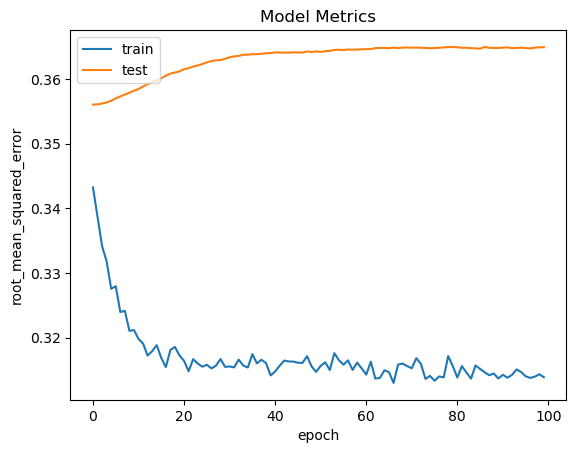

In [155]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Recommendation

In [270]:
place_df = travel_merge
df = pd.read_csv(f'dataset/tourism_rating.csv')

user_id = df.User_Id.head(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]
place_not_visited = travel[~travel['Place_Id'].isin(place_visited_by_user['Place_Id'].values)]
place_not_visited_list = place_not_visited['Place_Id'].values
place_not_visited_list = [[place_to_place_encoded.get(x)] for x in place_not_visited_list]
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited_list), place_not_visited_list)
)

In [299]:
top10 = place_visited_by_user.sort_values('Place_Ratings',ascending=False).head(10)
top10_visited = travel[travel['Place_Id'].isin(top10['Place_Id'].values)]
top10_visited['User_Rating']=top10['Place_Ratings'].values
print('Place with high ratings from user')
top10_visited

Place with high ratings from user


/tmp/ipykernel_5054/1944512723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_visited['User_Rating']=top10['Place_Ratings'].values


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Bag_of_words,User_Rating
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,Atlantis Water Adventure Atlantis Water Advent...,5
19,20,Museum Taman Prasasti,Museum Taman Prasasti adalah sebuah museum cag...,Budaya,Jakarta,2000,4.5,90.0,"{'lat': -6.172224099999998, 'lng': 106.8189695}",-6.172224,106.818969,Museum Taman Prasasti Museum Taman Prasasti ad...,5
40,41,Museum Bahari Jakarta,Museum Bahari adalah museum yang menyimpan kol...,Budaya,Jakarta,2000,4.4,120.0,"{'lat': -6.1269553, 'lng': 106.8085899}",-6.126955,106.808590,Museum Bahari Jakarta Museum Bahari adalah mus...,5
207,208,Taman Sungai Mudal,"Taman Sungai Mudal, sebuah objek wisata alam t...",Cagar Alam,Yogyakarta,10000,4.6,150.0,"{'lat': -7.762813599999998, 'lng': 110.1161626}",-7.762814,110.116163,"Taman Sungai Mudal Taman Sungai Mudal, sebuah ...",5
245,246,Curug Tilu Leuwi Opat,Curug Tilu Leuwi Opat merupakan salah satu wis...,Cagar Alam,Bandung,10000,4.4,120.0,"{'lat': -6.790569199999999, 'lng': 107.5826388}",-6.790569,107.582639,Curug Tilu Leuwi Opat Curug Tilu Leuwi Opat me...,5
257,258,Museum Gedung Sate,Salah satu museum yang menjadi ikon kota ini a...,Budaya,Bandung,5000,4.6,NaN,"{'lat': -6.902637899999999, 'lng': 107.619169}",-6.902638,107.619169,Museum Gedung Sate Salah satu museum yang menj...,5
264,265,Museum Mandala Wangsit Siliwangi,Museum Wangsit Mandala Siliwangi adalah museum...,Budaya,Bandung,0,4.4,60.0,"{'lat': -6.9173405, 'lng': 107.6112627}",-6.917340,107.611263,Museum Mandala Wangsit Siliwangi Museum Wangsi...,5
335,336,Grand Maerakaca,Masyarakat Jawa Tengah mungkin sudah tidak asi...,Taman Hiburan,Semarang,15000,4.4,NaN,"{'lat': -6.9605225, 'lng': 110.3863941}",-6.960522,110.386394,Grand Maerakaca Masyarakat Jawa Tengah mungkin...,4
392,393,Taman Harmoni Keputih,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Cagar Alam,Surabaya,0,4.4,60.0,"{'lat': -7.2952211, 'lng': 112.8035603}",-7.295221,112.803560,Taman Harmoni Keputih Tempat tersebut ialah Ta...,4
404,405,Surabaya North Quay,Surabaya menjadi kota besar yang sering menjad...,Taman Hiburan,Surabaya,50000,4.4,NaN,"{'lat': -7.1968193, 'lng': 112.7324578}",-7.196819,112.732458,Surabaya North Quay Surabaya menjadi kota besa...,4


In [275]:
ratings = model.predict(user_place_array).flatten()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step


In [302]:
print('Top 10 place recommendation')
place_not_visited['Predicted_Rating']=ratings*4+1
place_not_visited.sort_values('Predicted_Rating',ascending=False).head(10)

Top 10 place recommendation


/tmp/ipykernel_5054/2118543307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  place_not_visited['Predicted_Rating']=ratings*4+1


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Bag_of_words,Predicted_Rating
228,229,Rabbit Town,Rabbit Town Bandung merupakan salah satu wisat...,Taman Hiburan,Bandung,45000,4.0,90.0,"{'lat': -6.8669518, 'lng': 107.6100859}",-6.866952,107.610086,Rabbit Town Rabbit Town Bandung merupakan sala...,4.055298
384,385,Kampung Batik Gedong Semarang,Kampung Batik Semarang merupakan salah satu ka...,Budaya,Semarang,0,4.4,45.0,"{'lat': -6.968882100000001, 'lng': 110.4318692}",-6.968882,110.431869,Kampung Batik Gedong Semarang Kampung Batik Se...,4.034790
179,180,Pantai Depok Jogja,"Pantai Depok (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ ꦝꦺꦥꦺꦴꦏ꧀, tra...",Bahari,Yogyakarta,10000,4.3,NaN,"{'lat': -8.0137087, 'lng': 110.2914777}",-8.013709,110.291478,Pantai Depok Jogja Pantai Depok (bahasa Jawa: ...,3.983135
17,18,Museum Bank Indonesia,Museum Bank Indonesia adalah sebuah museum di ...,Budaya,Jakarta,2000,4.7,NaN,"{'lat': -6.137127, 'lng': 106.813005}",-6.137127,106.813005,Museum Bank Indonesia Museum Bank Indonesia ad...,3.970373
267,268,Sudut Pandang Bandung,Sudut Pandang Cafe Bandung merupakan sebuah de...,Taman Hiburan,Bandung,50000,4.6,150.0,"{'lat': -6.842363799999999, 'lng': 107.6232403}",-6.842364,107.623240,Sudut Pandang Bandung Sudut Pandang Cafe Bandu...,3.928788
398,399,Taman Pelangi,Kalau pelangi biasanya ada di siang hari pasca...,Taman Hiburan,Surabaya,0,4.5,20.0,"{'lat': -7.3275604, 'lng': 112.7312242}",-7.327560,112.731224,Taman Pelangi Kalau pelangi biasanya ada di si...,3.838313
289,290,Museum Pendidikan Nasional,Museum Pendidikan Nasional Universitas Pendidi...,Budaya,Bandung,5000,4.6,NaN,"{'lat': -6.859747400000001, 'lng': 107.5941693}",-6.859747,107.594169,Museum Pendidikan Nasional Museum Pendidikan N...,3.837185
132,133,Puncak Kebun Buah Mangunan,Berlibur di pegunungan memang menyenangkan. Da...,Taman Hiburan,Yogyakarta,5000,4.6,90.0,"{'lat': -7.941371800000001, 'lng': 110.4247345}",-7.941372,110.424734,Puncak Kebun Buah Mangunan Berlibur di pegunun...,3.820776
270,271,Taman Vanda,Taman Vanda Bandung adalah taman yang terletak...,Taman Hiburan,Bandung,0,4.3,45.0,"{'lat': -6.9140478, 'lng': 107.6101684}",-6.914048,107.610168,Taman Vanda Taman Vanda Bandung adalah taman y...,3.797275
170,171,Candi Ijo,"Candi Ijo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦆꦗꦺꦴ, translit. ...",Budaya,Yogyakarta,5000,4.6,60.0,"{'lat': -7.783827600000001, 'lng': 110.5118987}",-7.783828,110.511899,"Candi Ijo Candi Ijo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦆꦗꦺꦴ, ...",3.772450


In this content base filtering recommender system, users who enjoy visiting amusement parks or cultural sites such as museums are likely to receive recommendations for similar travel experiences, utilizing deep learning techniques, particularly the embedding layer. For instance, recommendations might include visits to places like Rabbit Town or Kampung Batik.